# Introduction

Here I'm looking at the cover times of the random walker versus the urban explorer on the ring graph

/home/kokeeffe/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


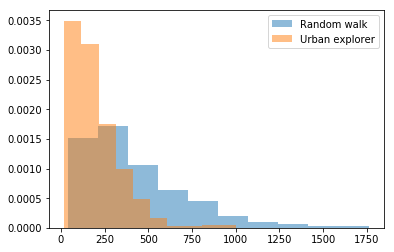

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import funcs as f
import osmnx as ox
import networkx as nx
from multiprocessing import Pool
from datetime import datetime
import time as time
from scipy import optimize
import pickle
%matplotlib inline

num_nodes = 20
G = nx.path_graph(num_nodes)

num_trials, m = 1000, 1  # m = number of times each node has to be covered
Ts_rw = f.random_walk_covertime(G,m,num_trials=num_trials)
Ts_ue = f.urban_explorer_covertime(G,m,num_trials=num_trials)
plt.hist(Ts_rw,normed=True,alpha=0.5);plt.hist(Ts_ue,normed=True,alpha=0.5);
plt.legend(['Random walk','Urban explorer'])

#np.savetxt('data/covertimes_path_urban_explorer.txt',Ts_ue)
#np.savetxt('data/covertimes_path_random_walker.txt',Ts_rw)

Good. Makes sense; the advective part of the urban explorer is useful on the ring. I wonder could I find
that curve analytically. Is it an exponential?

## Be systematic

finished N = 5
finished N = 10
finished N = 15
finished N = 20
finished N = 25
finished N = 30
finished N = 35
finished N = 40
finished N = 45
finished N = 50
finished N = 55
finished N = 60
finished N = 65
finished N = 70
finished N = 75
finished N = 80
finished N = 85
finished N = 90
finished N = 95
finished N = 100


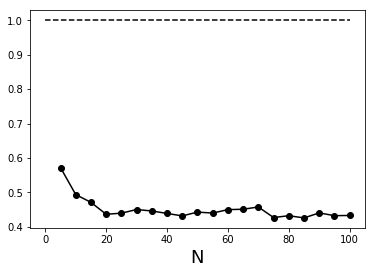

In [14]:
meanTratios = []
varTratios = []
Ns = range(5,101,5)
m = 1
for N in Ns:
    num_trials = 2000
    G = nx.path_graph(N)
    Ts_rw = f.random_walk_covertime(G,m,num_trials=num_trials)
    Ts_ue = f.urban_explorer_covertime(G,m,num_trials=num_trials)
    meanTratios.append(np.mean(Ts_ue)/np.mean(Ts_rw))
    #varTratios.append(np.std(Ts_ue) / np.std(Ts_rw) ) 
    print 'finished N = ' + str(N)
plt.plot(Ns,meanTratios,'ko-')
#plt.plot(Ns,varTratios,'ko-')
plt.xlabel('N',fontsize=18)
#plt.ylabel(' $ \langle T \rangle_{UE} / \langle T \rangle_{RW} $ ')
plt.hlines(1,0,max(Ns),linestyles='dashed')

np.savetxt('data/mean_covertime_ratio_path.txt',meanTratios)
np.savetxt('data/mean_covertime_ratio_path_Ns.txt',Ns)

In [16]:
mT_rw = []
mT_ur = []
Ns = [10,100,500,1000,2000,5000]
m = 1
for N in Ns:
    num_trials = 100
    G = nx.path_graph(N)
    Ts_rw = f.random_walk_covertime(G,m,num_trials=num_trials)
    Ts_ue = f.urban_explorer_covertime(G,m,num_trials=num_trials)
    meanTratios.append(np.mean(Ts_ue)/np.mean(Ts_rw))
    #varTratios.append(np.std(Ts_ue) / np.std(Ts_rw) ) 
    print 'finished N = ' + str(N)
plt.plot(Ns,meanTratios,'ko-')
#plt.plot(Ns,varTratios,'ko-')
plt.xlabel('N',fontsize=18)
#plt.ylabel(' $ \langle T \rangle_{UE} / \langle T \rangle_{RW} $ ')
plt.hlines(1,0,max(Ns),linestyles='dashed')

finished N = 10
finished N = 100
finished N = 500
finished N = 1000


KeyboardInterrupt: 

### Asymptotic

finished N = 10
finished N = 50
finished N = 100
finished N = 150
finished N = 200
finished N = 250
finished N = 300
finished N = 350
finished N = 400
finished N = 450
finished N = 500


<ErrorbarContainer object of 3 artists>

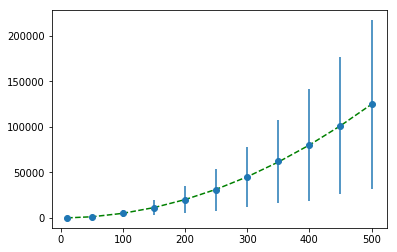

In [52]:
meanTs = []
varTs = []
Ns = [10] + range(50,501,50)
m = 1
for N in Ns:
    num_trials = 5000
    G = nx.path_graph(N)
    Ts_ue = f.urban_explorer_covertime(G,m,num_trials=num_trials)
    meanTs.append(np.mean(Ts_ue))
    varTs.append(np.std(Ts_ue)) 
    print 'finished N = ' + str(N)
    
    
from scipy.optimize import curve_fit
def func(N,b,c):
    return b*N**c
popt, pcov = curve_fit(func,Ns,meanTs)
plt.plot(Ns, func(Ns, *popt), 'g--')
plt.errorbar(Ns,meanTs,yerr=varTs,fmt='o')

#np.savetxt('data/mean_covertime_ratio_path.txt',meanTratios)
#np.savetxt('data/mean_covertime_ratio_path_Ns.txt',Ns)

I'm rerunning for 5000 trials, to be as sure as possible of the results

finished N = 10
finished N = 50
finished N = 100
finished N = 150
finished N = 200
finished N = 250
finished N = 300
finished N = 350
finished N = 400
finished N = 450
finished N = 500


<ErrorbarContainer object of 3 artists>

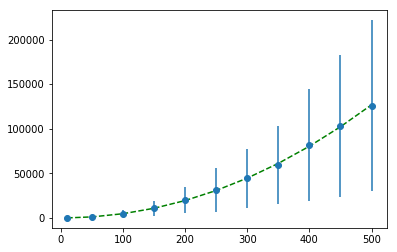

In [55]:
meanTs = []
varTs = []
Ns = [10] + range(50,501,50)
m = 1
for N in Ns:
    num_trials = 1000
    G = nx.path_graph(N)
    Ts_ue = f.urban_explorer_covertime(G,m,num_trials=num_trials)
    meanTs.append(np.mean(Ts_ue))
    varTs.append(np.std(Ts_ue)) 
    print 'finished N = ' + str(N)
    
    
from scipy.optimize import curve_fit
def func(N,b,c):
    return b*N**c
popt, pcov = curve_fit(func,Ns,meanTs)
plt.plot(Ns, func(Ns, *popt), 'g--')
plt.errorbar(Ns,meanTs,yerr=varTs,fmt='o')

#np.savetxt('data/mean_covertime_ratio_path.txt',meanTratios)
#np.savetxt('data/mean_covertime_ratio_path_Ns.txt',Ns)

In [46]:
np.savetxt('data/mean_cover_td_path.txt',meanTs)
np.savetxt('data/mean_cover_td_path_Ns.txt',Ns)
np.savetxt('data/mean_cover_td_path_std.txt',varTs)

In [56]:
from scipy.optimize import curve_fit
def func(N,b):
    return N*b
popt, pcov = curve_fit(func,Ns,T_mean)
plt.plot(Ns, [func(N,popt[0]) for N in Ns], 'g--')
plt.errorbar(Ns,T_mean,yerr=T_std,fmt='o')

NameError: name 'T_mean' is not defined